In [1]:
# load sage packages
load('/Applications/SageMath/NumericalSemigroup.sage')
load('/Applications/SageMath/KunzPoset.sage')
load('/Applications/SageMath/PlotKunzPoset.sage')
from sage.combinat.posets.posets import FinitePoset

true
Successfully loaded Singular


In [2]:
# Given two posets P1 and P2, determine if P1 contains all relations in P2. If so, P1 is a refinement of P2
def check_refinement(P1, P2):
    R1 = P1.hyperplane_desc
    R2 = P2.hyperplane_desc
    for r in R2:
        if r not in R1:
            return False
    return True

In [3]:
# Classify all posets of a kunz polyhedron by their dimensions
def classify(Ps):
    result = []
    for i in range(Ps[0].m):
        result.append([])
    
    for i in range(len(Ps)):
        result[Ps[i].Dimension()].append(i)
    
    return result

In [4]:
# find all the posets below a given poset P using a classified list of posets by their dimensions
def child_posets(P, Pd, Ps):
    result = []
    d = P.Dimension()
    for i in Pd[d-1]:
        if check_refinement(Ps[i], P):
            result.append(i)
    return result

In [5]:
# for a given poset P, find the embedding dimension of all its child posets
def child_ED(P, Pd, Ps):
    result = []
    d = P.Dimension()
    for i in Pd[d-1]:
        if check_refinement(Ps[i], P):
            result.append((i, len(Ps[i].atoms), len(Ps[i].hyperplane_desc)))
    return result

In [6]:
# for a given poset P, find the number of facets added for all its child posets
def child_relations(P, Pd, Ps):
    result = []
    d = P.Dimension()
    n = len(P.hyperplane_desc)
    for i in Pd[d-1]:
        if check_refinement(Ps[i], P):
            result.append((i, len(Ps[i].hyperplane_desc)))
    return result

In [7]:
# compute the cover relations for the ED-poset of a Kunz polyhedron
def ED_poset(Ps):
    result = []
    Pd = classify(Ps)
    for i in range(len(Ps)):
        P = Ps[i]
        d = P.Dimension()
        ed = len(P.atoms)
        ef = len(P.hyperplane_desc)
        lchild = child_ED(P, Pd, Ps)
        for (c, cd, cf) in lchild:
            if ((d-1, cd), (d, ed)) not in result:
                result.append(((d-1, cd), (d, ed)))  
    return result

In [8]:
# compute the cover relations for the ED-poset of a Kunz polyhedron
def EF_poset(Ps):
    result = []
    Pd = classify(Ps)
    for i in range(len(Ps)):
        P = Ps[i]
        d = P.Dimension()
        ed = len(P.atoms)
        ef = len(P.hyperplane_desc)
        lchild = child_ED(P, Pd, Ps)
        for (c, cd, cf) in lchild:
            if ((d-1, cd, cf), (d, ed, ef)) not in result:
                result.append(((d-1, cd, cf), (d, ed, ef)))
    return result

In [9]:
# compute the cover relations for the ED-poset of a Kunz polyhedron
def relation_poset(Ps):
    result = []
    Pd = classify(Ps)
    for i in range(len(Ps)):
        P = Ps[i]
        d = P.Dimension()
        ef = len(P.hyperplane_desc)
        lchild = child_relations(P, Pd, Ps)
        for (c, cf) in lchild:
            if ((d-1, cf), (d, ef)) not in result:
                result.append(((d-1, cf), (d, ef)))
    return result

In [10]:
# find posets whose number of defining facet equations is n and whose face dimension is d
def find_poset_nd(Ps, Pd, d, n):
    result = []
    pd = Pd[d]
    for i in pd:
        if len(Ps[i].hyperplane_desc) == n:
            result.append(i)
    return result

In [11]:
# find a poset with face dimension d and embedding dimension e
def find_poset_ed(Ps, Pd, d, e):
    result = []
    pd = Pd[d]
    for i in pd:
        if len(Ps[i].atoms) == e:
            result.append(i)
    return result

In [12]:
# find a poset below P by adding a single facet equation
def add_one_facet(P, Ps):
    Pd = classify(Ps)
    cd = child_ED(P, Pd, Ps)
    for i in range(len(cd)):
        if cd[i][2] - (len(result)-1) == 1:
            return i
    return False

In [13]:
# find a flag that contains the maximal jump of embedding dimension
def find_maximal_flag(Ps):
    result = [(0,Ps[0].m-1, Ps[0].m-1)]
    Pd = classify(Ps)
    P = Ps[0]
    while len(result) != Ps[0].m-2:
        cd = child_ED(P, Pd, Ps)
        #maxd = -1
        #c = 0
        #for i in range(len(cd)):
        #    if cd[i][1] - (Ps[0].m-len(result)) > maxd:
        #        c = cd[i][0]
        #        maxd = cd[i][1] - (Ps[0].m-len(result))
        #result.append((c, Ps[0].m-len(result), cd[i][1]))
        #P = Ps[c]
        for i in range(len(cd)):
            if cd[i][2] - (len(result)-1) == 1:
                P = Ps[cd[i][0]]
                result.append((cd[i][0], Ps[0].m-len(result)-1, cd[i][1]))
                break
            if (i == len(cd)-1):
                return result
        
    cd = child_ED(P, Pd, Ps)
    for i in range(len(cd)):
        if cd[i][1] == 1:
            result.append((cd[i][0],1,1))
            break
    return result

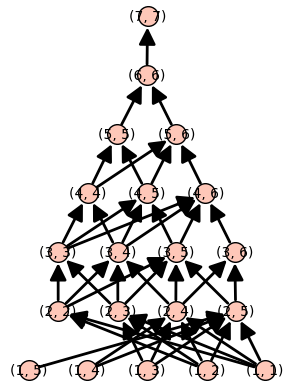

In [25]:
# load data for a Kunz polyhedron
facfile = '/Applications/SageMath/data/m8.fac'
hpfile = '/Applications/SageMath/data/m8.out'
Ps = KunzPoset.ReadFacesFromNormaliz(face_lattice_file_path=facfile, hplane_file_path=hpfile)

cover_relations = ED_poset(Ps)
FinitePoset(DiGraph(cover_relations).transitive_reduction()).plot()

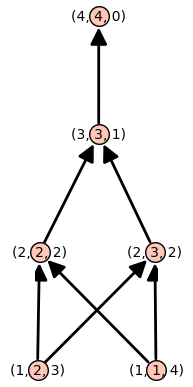

In [23]:
cover_relations = EF_poset(Ps)
FinitePoset(DiGraph(cover_relations).transitive_reduction()).plot()

In [16]:
find_consistent_flag(Ps)

NameError: name 'find_consistent_flag' is not defined

In [ ]:
Pd = classify(Ps)
d = 1
n = 5
result = find_poset_nd(Ps, Pd, d, n)
for i in result:
    if len(Ps[i].atoms) == 3:
        print(i)

In [ ]:
result = find_poset_ed(Ps, Pd, 2, 3)
for i in result:
    ce = child_ED(Ps[i], Pd, Ps)
    for (c, cd, cf) in ce:
        if cd == 4:
            print(c)

In [26]:
Pd = classify(Ps)
find_poset_ed(Ps, Pd, 1, 4)

[1239]

In [ ]:
P = Ps[881]
P.poset

In [ ]:
P = Ps[4181]
P.poset

In [ ]:
P = KunzPoset(semigroup_gens = [15,16,17,18,19,20,21,22,23,24,25,26,27])
P.poset